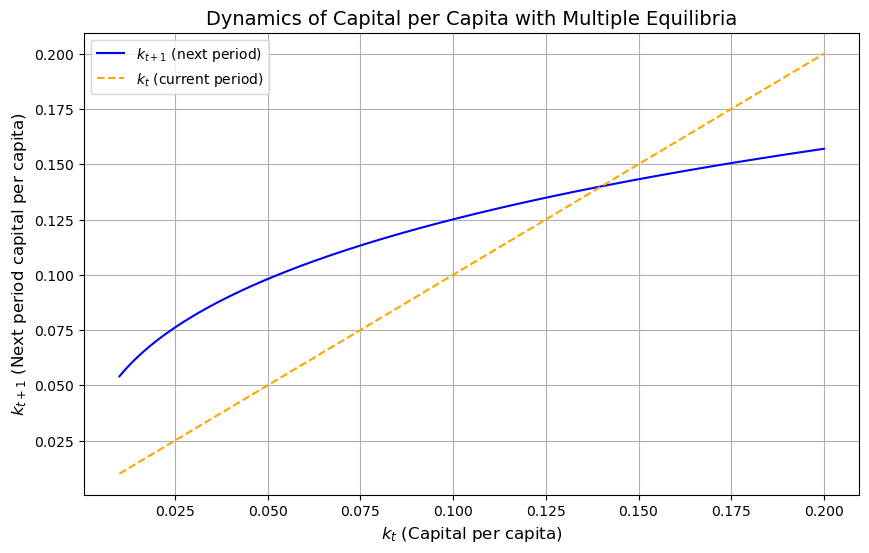

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del modelo
A = 1          # Productividad
alpha = 0.3    # Elasticidad del capital
phi = 0.09      # Externalidad positiva
beta = 0.9     # Tasa de preferencia intertemporal
delta = 0.1    # Tasa de depreciación

# Dinámica del capital
def capital_next(k):
    coef = beta / (1 + beta) * (1 - alpha) * A
    return coef * k**(alpha + phi) - delta * k

# Rango de capital per cápita
k_vals = np.linspace(0.01, 0.2, 500)
k_t1_vals = [capital_next(k) for k in k_vals]

# Gráfico
plt.figure(figsize=(10, 6))
plt.plot(k_vals, k_t1_vals, label="$k_{t+1}$ (next period)", color="blue")
plt.plot(k_vals, k_vals, label="$k_{t}$ (current period)", linestyle="--", color="orange")
plt.xlabel("$k_t$ (Capital per capita)", fontsize=12)
plt.ylabel("$k_{t+1}$ (Next period capital per capita)", fontsize=12)
plt.title("Dynamics of Capital per Capita with Multiple Equilibria", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)
plt.show()


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

# Parameters
A = 1.5  # Productivity
alpha = 0.5  # Capital elasticity
s = 0.3  # Savings rate

# Function for capital dynamics
def capital_dynamics(k, A, alpha, s, beta):
    return s * A * k**alpha * (1 + beta * k**2)

# Range of k for plotting
k_vals = np.linspace(0, 3.5, 500)

# Interactive plotting function
def plot_dynamics(beta):
    # Calculate the dynamics
    k_next = capital_dynamics(k_vals, A, alpha, s, beta)
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(k_vals, k_next, label=f"Beta = {beta}")
    plt.plot(k_vals, k_vals, 'k--', label="k(t+1) = k(t)")
    plt.title("Capital Dynamics with Beta Parameter")
    plt.xlabel("k(t)")
    plt.ylabel("k(t+1)")
    plt.legend()
    plt.grid()
    plt.show()

# Create an interactive slider for beta
interact(plot_dynamics, beta=(0.1, 5.0, 0.01))


interactive(children=(FloatSlider(value=2.5500000000000003, description='beta', max=5.0, min=0.1, step=0.01), …

<function __main__.plot_dynamics(beta)>

: 

C:\Users\wilso\AppData\Local\Temp\ipykernel_37768\1268830839.py:12: RuntimeWarning: invalid value encountered in sqrt
  return k - s * A * k**alpha * (1 + beta * k**2)
C:\Users\wilso\AppData\Local\Temp\ipykernel_37768\1268830839.py:33: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  root = fsolve(steady_state_equation, initial_guess, args=(beta, A, alpha, s))[0]
C:\Users\wilso\AppData\Local\Temp\ipykernel_37768\1268830839.py:33: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  root = fsolve(steady_state_equation, initial_guess, args=(beta, A, alpha, s))[0]


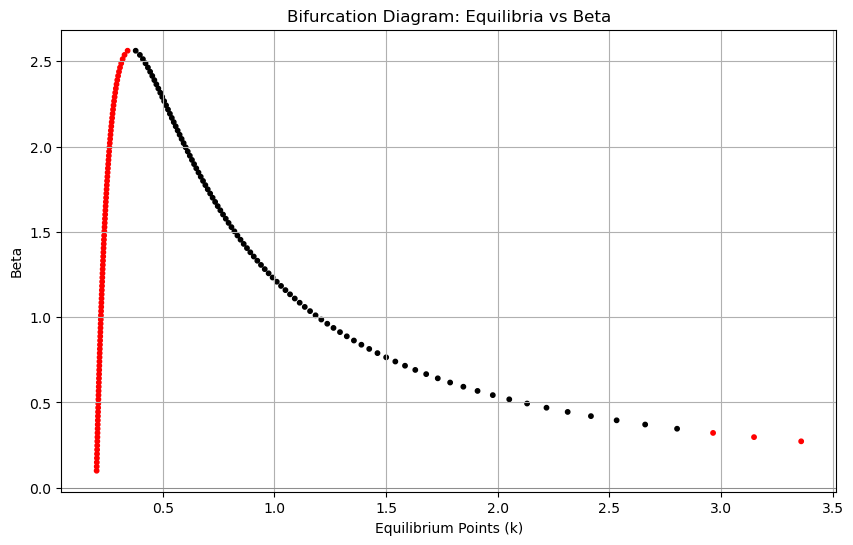

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Parameters
A = 1.5  # Productivity
alpha = 0.5  # Capital elasticity
s = 0.3  # Savings rate

# Function for the steady-state equation
def steady_state_equation(k, beta, A, alpha, s):
    return k - s * A * k**alpha * (1 + beta * k**2)

# Derivative of k_{t+1} with respect to k_t
def derivative_k_next(k, beta, A, alpha, s):
    term1 = alpha * s * A * k**(alpha - 1) * (1 + beta * k**2)
    term2 = s * A * k**alpha * 2 * beta * k
    return term1 + term2

# Range of beta values
beta_vals = np.linspace(0.1, 5.0, 200)

# Initialize arrays to store equilibrium values
k_eq_points = []
stabilities = []

# Compute equilibrium points for each beta
for beta in beta_vals:
    # Solve for k using fsolve (non-linear root-finding)
    roots = []
    stability = []
    for initial_guess in [0.1, 1.0, 2.0]:  # Multiple guesses to capture all equilibria
        root = fsolve(steady_state_equation, initial_guess, args=(beta, A, alpha, s))[0]
        if root > 0 and np.isclose(steady_state_equation(root, beta, A, alpha, s), 0):  # Valid root
            roots.append(root)
            # Determine stability
            derivative = derivative_k_next(root, beta, A, alpha, s)
            stability.append("stable" if abs(derivative) < 1 else "unstable")
    # Keep only unique equilibrium points
    roots = np.unique(np.round(roots, decimals=6))
    stability = [stability[i] for i in range(len(roots))]
    k_eq_points.append(roots)
    stabilities.append(stability)

# Prepare data for bifurcation plot
beta_plot = []
k_plot = []
colors = []

for beta, roots, stability in zip(beta_vals, k_eq_points, stabilities):
    for k, st in zip(roots, stability):
        beta_plot.append(beta)
        k_plot.append(k)
        colors.append("red" if st == "stable" else "black")

# Plot the bifurcation diagram
plt.figure(figsize=(10, 6))
plt.scatter(k_plot, beta_plot, s=10, c=colors, label="Equilibrium Points")
plt.axhline(0, color='gray', linewidth=0.5)  # Horizontal axis line
plt.title("Bifurcation Diagram: Equilibria vs Beta")
plt.xlabel("Equilibrium Points (k)")
plt.ylabel("Beta")
plt.grid()
plt.show()
